The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [2]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
nobel = pd.read_csv('./data/nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel.shape

(1000, 18)

In [4]:
nobel.dtypes

year                     int64
category                object
prize                   object
motivation              object
prize_share             object
laureate_id              int64
laureate_type           object
full_name               object
birth_date              object
birth_city              object
birth_country           object
sex                     object
organization_name       object
organization_city       object
organization_country    object
death_date              object
death_city              object
death_country           object
dtype: object

In [5]:
top_gender = nobel['sex'].value_counts().idxmax()
top_gender

'Male'

<Axes: xlabel='sex', ylabel='count'>

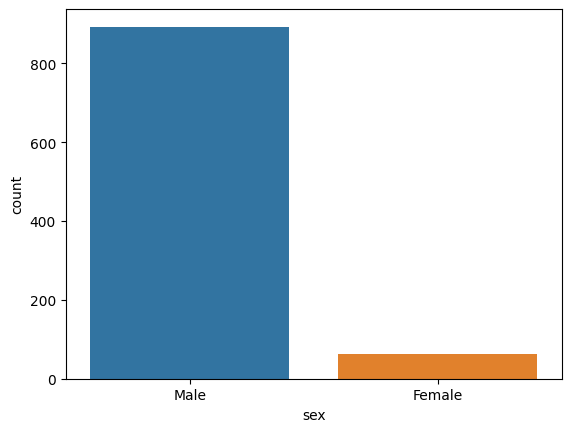

In [21]:
sns.countplot(x='sex', data=nobel, hue='sex', legend=False)

In [26]:
top_country = nobel['birth_country'].value_counts()
top_country.head()

birth_country
United States of America    287
United Kingdom               90
Germany                      67
France                       57
Sweden                       30
Name: count, dtype: int64

n

<Axes: xlabel='birth_country'>

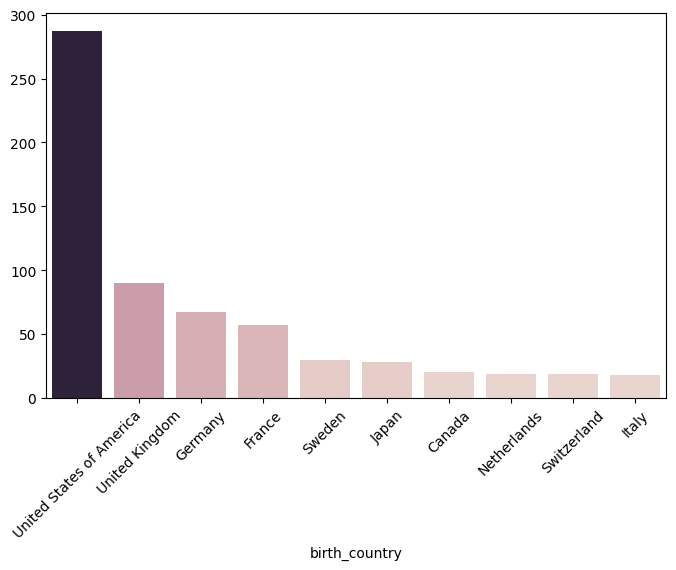

In [46]:
country_counts = nobel['birth_country'].value_counts()
country_counts = country_counts.head(10)
plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x=country_counts.index,
            y=country_counts.values, hue=country_counts, legend=False)

In [8]:
nobel['birth_date'].isnull().sum()

32

In [9]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format='%Y-%m-%d', errors='coerce')
nobel = nobel.dropna(subset=['birth_date'])
# print(type(nobel['birth_date']))

In [10]:
nobel['birth_country'].value_counts()

birth_country
United States of America                        287
United Kingdom                                   90
Germany                                          67
France                                           57
Sweden                                           30
                                               ... 
Russian Empire (Azerbaijan)                       1
Southern Rhodesia (Zimbabwe)                      1
Brazil                                            1
Guadeloupe Island                                 1
French protectorate of Tunisia (now Tunisia)      1
Name: count, Length: 126, dtype: int64

In [15]:
us_winner = nobel[nobel['birth_country'] == 'United States of America'].groupby(nobel['birth_date'].dt.year // 10*10).size()
by_decade = nobel.groupby(nobel['birth_date'].dt.year // 10*10).size()
ratio = us_winner/by_decade
max_decade_us = ratio.idxmax()
print(max_decade_us)

1950


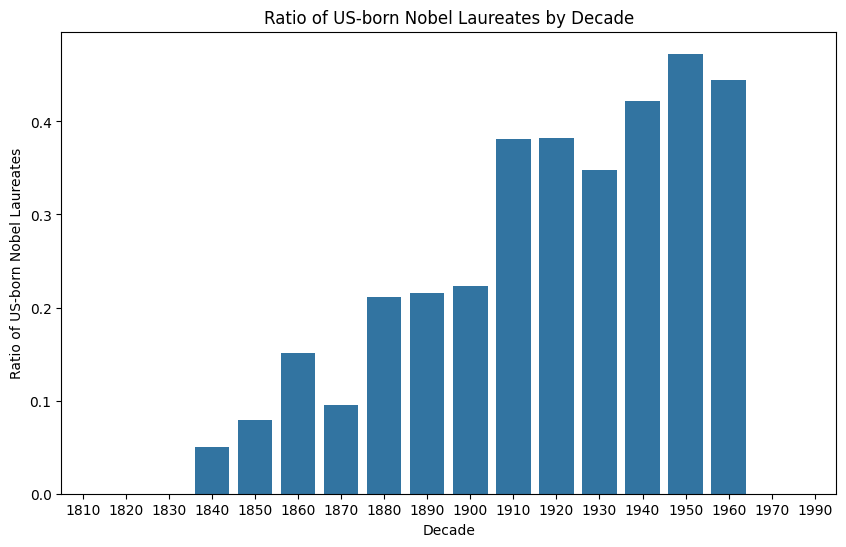

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio.index, y=ratio.values)
plt.xlabel('Decade')
plt.ylabel('Ratio of US-born Nobel Laureates')
plt.title('Ratio of US-born Nobel Laureates by Decade')
plt.show()

In [ ]:
nobel.dtypes

year                             int64
category                        object
prize                           object
motivation                      object
prize_share                     object
laureate_id                      int64
laureate_type                   object
full_name                       object
birth_date              datetime64[ns]
birth_city                      object
birth_country                   object
sex                             object
organization_name               object
organization_city               object
organization_country            object
death_date                      object
death_city                      object
death_country                   object
dtype: object

## `Number: 3`

In [49]:
nobel['decade'] = (nobel['year'] // 10) * 10

In [60]:
female_counts = nobel[nobel['sex'] == 'Female'].groupby(['decade', 'category']).size()
total_count = nobel.groupby(['decade', 'category']).size()
famale_proportion = female_counts/total_count

# Find the combination of decade and category with the highest proportion of female laureates
max_proportion = famale_proportion.idxmax()
max_decade = max_proportion[0]
max_category = max_proportion[1]

# Store the result in the dictionary
max_female_dict = {max_decade: max_category}
max_female_dict


{2020: 'Literature'}

## `Number: 4`

In [57]:
female_laureates =  nobel[nobel['sex'] == 'Female']
first_woman = female_laureates.sort_values(by='year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

# Menghitung jumlah Hadiah Nobel yang diterima per pemenang
prize_counts = nobel.groupby('full_name').size()

# Membuat daftar pemenang yang menerima Hadiah Nobel lebih dari sekali
repeat_list = prize_counts[prize_counts > 1].index.tolist()

## `Number: 5`

In [58]:
# Group by full_name and count the number of prizes
prize_counts = nobel['full_name'].value_counts()

# Filter for those with more than one prize
repeat_winners = prize_counts[prize_counts > 1].index.tolist()

repeat_list = repeat_winners

# Display results
first_woman_name, first_woman_category, repeat_list

('Marie Curie, née Sklodowska',
 'Physics',
 ['Linus Carl Pauling',
  'Frederick Sanger',
  'John Bardeen',
  'Marie Curie, née Sklodowska'])